# Bike Rental Machine Learning Assignment with Linear Regression

### **Step 1: Import the necessary Libraries**

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### **Step 2: Load the Dataset**

In [290]:
# Load the dataset
df = pd.read_csv('C:\\Users\\pookam\\Downloads\\day.csv')

In [291]:
# Check the head of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### **Step 3: Evaluate and understand the Data**

In [292]:
# Check the column names
print(df.columns)

# checking the shape of dataframe
df.shape

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


(730, 16)

In [293]:
## describing the columns of dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [294]:
# Checking for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Duplicate Rows:\n", duplicate_rows)

Duplicate Rows:
 0


In [295]:
# checking for the null values in column data
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### **Step 4: Data Cleaning**

First, let's drop the columns that are not needed for our analysis. The columns 'instant' and 'dteday' are not necessary as 'instant' is just an index and 'dteday' can be represented by 'year' and 'month'. Additionally, 'casual' and 'registered' are subsets of 'cnt', so we can drop them as well.

In [296]:
# Dropping unnecessary columns
df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

Renaming Columns and Converting Numerical Values to Categorical Values

In [297]:
# Renaming columns for better readability
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity', 'cnt':'count'}, inplace=True)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Next, we'll map the numerical values in the 'season', 'month', 'weekday', and 'weathersit' columns to their respective categorical string values.

In [298]:
# Encoding season column
df[['season']] = df[['season']].apply(lambda x: x.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}))

# Encoding month column
df[['month']] = df[['month']].apply(lambda x: x.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'}))

# Encoding weekday column
df[['weekday']] = df[['weekday']].apply(lambda x: x.map({0:'mon', 1:'tue', 2:'wed', 3:'thu', 4:'fri', 5:'sat', 6:'sun'}))

# Encoding weathersit column
df[['weathersit']] = df[['weathersit']].apply(lambda x: x.map({1:'Clear', 2:'Misty', 3:'Light Rain', 4:'Heavy Rain'}))

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,0,jan,0,sun,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,jan,0,mon,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,jan,0,tue,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,jan,0,wed,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,jan,0,thu,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


After these transformations, let's take a look at the first few rows of the dataset to ensure everything is in order.

In [299]:
# Display the first few rows of the dataset
df.head()

# Display the column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### **Step 5: Visualization & Exploratory Data Analysis (EDA)**

Checking for outliers in numerical columns

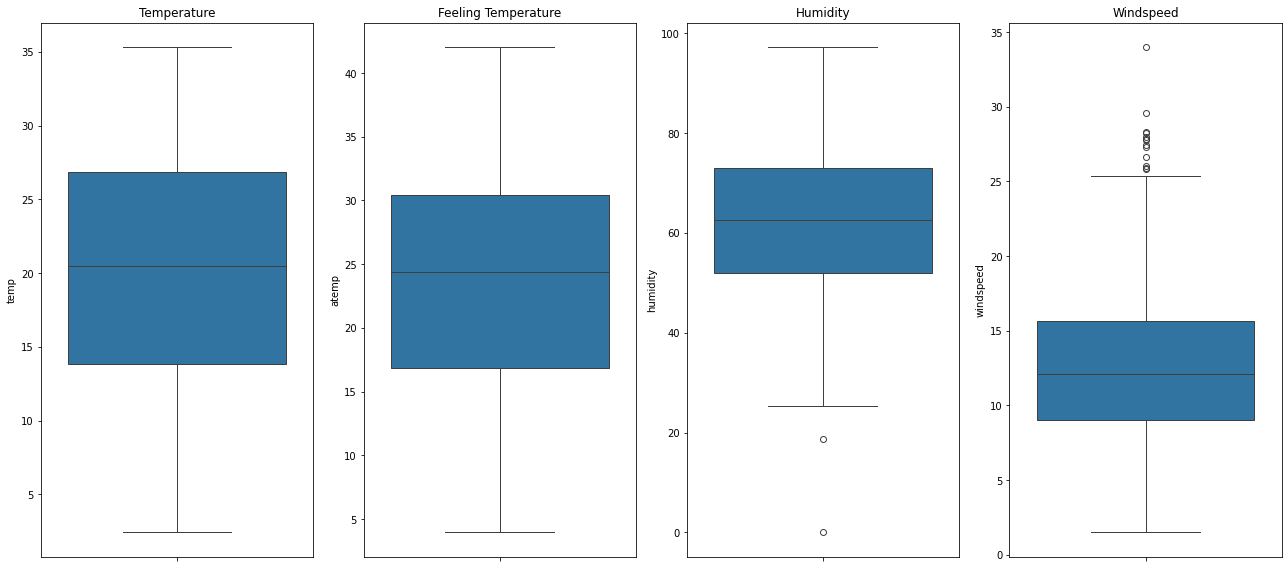

In [300]:
# Checking for outliers in numerical columns
plt.figure(figsize=(18, 8))

# Box plots for numerical variables
plt.subplot(1, 4, 1)
sns.boxplot(y='temp', data=df)
plt.title('Temperature')

plt.subplot(1, 4, 2)
sns.boxplot(y='atemp', data=df)
plt.title('Feeling Temperature')

plt.subplot(1, 4, 3)
sns.boxplot(y='humidity', data=df)
plt.title('Humidity')

plt.subplot(1, 4, 4)
sns.boxplot(y='windspeed', data=df)
plt.title('Windspeed')

plt.tight_layout()
plt.show()

It appears there are no major outliers we should be concerned about

- Visualizing **Numeric** Variables

First, let's create pair plots to visualize the relationships between the numeric variables and the target variable 'count'.

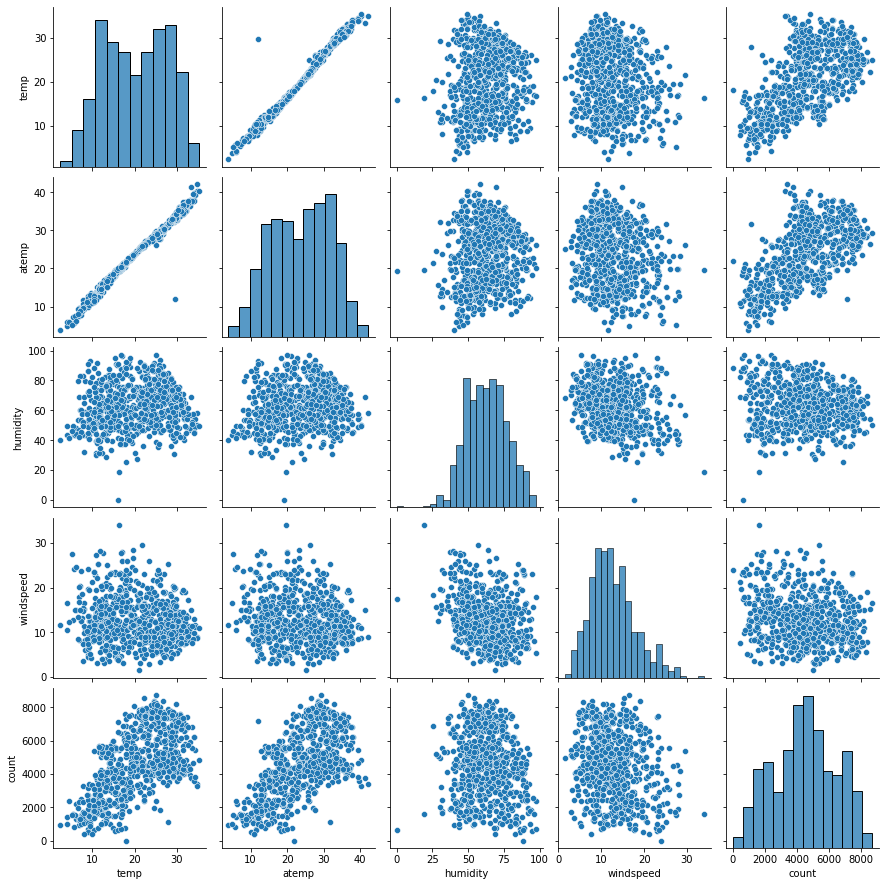

In [301]:
# Visualizing numeric variables using pair plots
sns.pairplot(df, vars=['temp', 'atemp', 'humidity', 'windspeed', 'count'])
plt.show()

From the pair plots, we can observe that 'temp' and 'atemp' have the highest correlation with the target variable 'count'. Additionally, 'temp' and 'atemp' are highly correlated with each other.

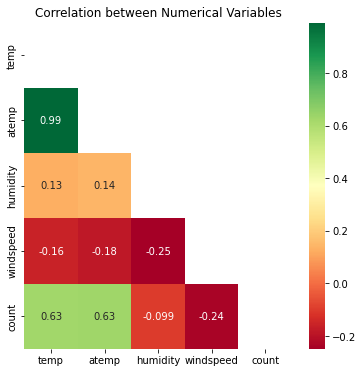

In [302]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','count']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','count']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()


```
There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity
```

- Visualising **Categorical columns** to see the coorelation of predictor variable with the target variable

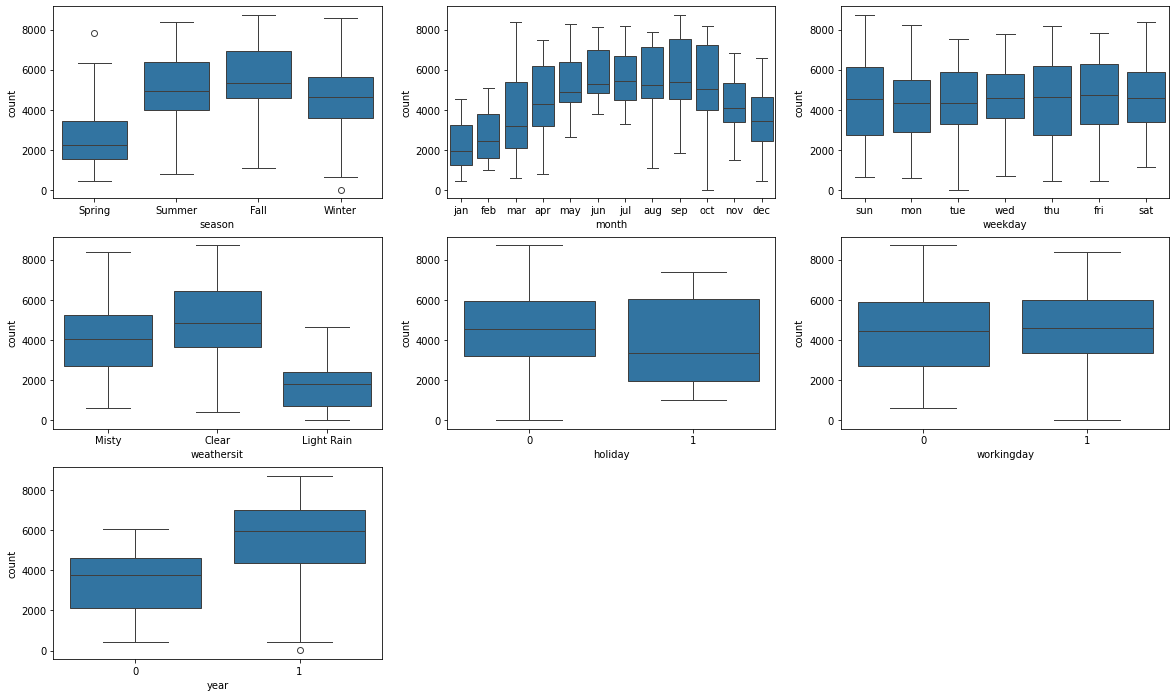

In [304]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'count', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'month', y = 'count', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'count', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'count', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'count', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'year', y = 'count', data = df)
plt.show()

From the visualizations, we can derive several insights:

- Seasonal Trends: The demand for rental bikes peaks in the fall season.
- Monthly Trends: The demand for rental bikes rises steadily each month until June, with September experiencing the highest demand before it starts to decline.
- Weekdays and Working Days: There isn't much variation in demand during weekdays and working days.
- Weather Conditions: Clear weather conditions see the highest demand for bike rentals.
- Holidays: The demand for bike rentals decreases on holidays.
- Yearly Growth: There is noticeable growth in demand for the following year.

season
Fall      32.24
Spring    14.27
Summer    27.91
Winter    25.57
Name: count, dtype: float64


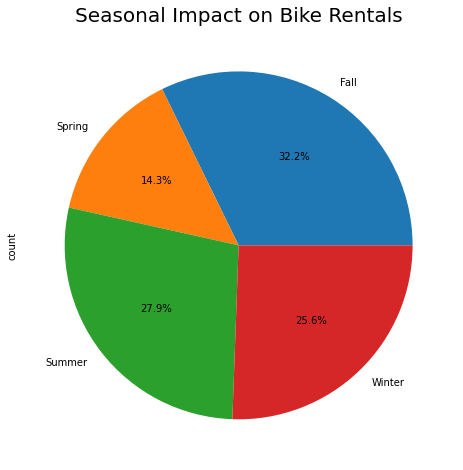

In [305]:
# Checking the seasonal impact on the total count of rental bikes
seasonal_impact = round(df.groupby('season')['count'].sum() / df['count'].sum() * 100, 2)
print(seasonal_impact)

# Plotting a pie chart for better visualization
plt.figure(figsize=(8, 8))
df.groupby(["season"])["count"].sum().plot.pie(autopct='%1.1f%%')
plt.title("Seasonal Impact on Bike Rentals", fontsize=20)
plt.show()

```
Observations: Spring has the least bike rentals, while Fall has the highest.
```

year
0    37.77
1    62.23
Name: count, dtype: float64


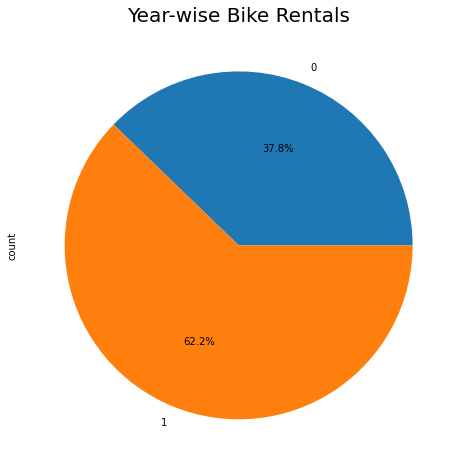

In [306]:
# Checking the year-wise count of rental bikes
yearly_impact = round(df.groupby('year')['count'].sum() / df['count'].sum() * 100, 2)
print(yearly_impact)

# Plotting a pie chart for better visualization
plt.figure(figsize=(8, 8))
df.groupby(["year"])["count"].sum().plot.pie(autopct='%1.1f%%')
plt.title("Year-wise Bike Rentals", fontsize=20)
plt.show()


```
Observations: There is a considerable increase in bike rentals from 2018 to 2019.
```

month
apr     8.18
aug    10.67
dec     6.41
feb     4.54
jan     4.10
jul    10.48
jun    10.52
mar     6.96
may    10.08
nov     7.74
oct     9.80
sep    10.51
Name: count, dtype: float64


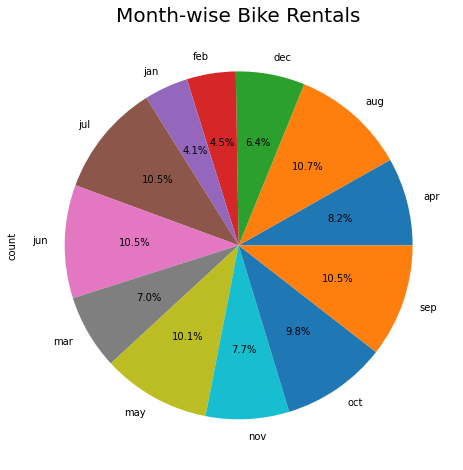

In [307]:
# Checking the monthly count of rental bikes
monthly_impact = round(df.groupby('month')['count'].sum() / df['count'].sum() * 100, 2)
print(monthly_impact)

# Plotting a pie chart for better visualization
plt.figure(figsize=(8, 8))
df.groupby(["month"])["count"].sum().plot.pie(autopct='%1.1f%%')
plt.title("Month-wise Bike Rentals", fontsize=20)
plt.show()

```
Observations: The months from April to October show high demand for bike rentals.
```

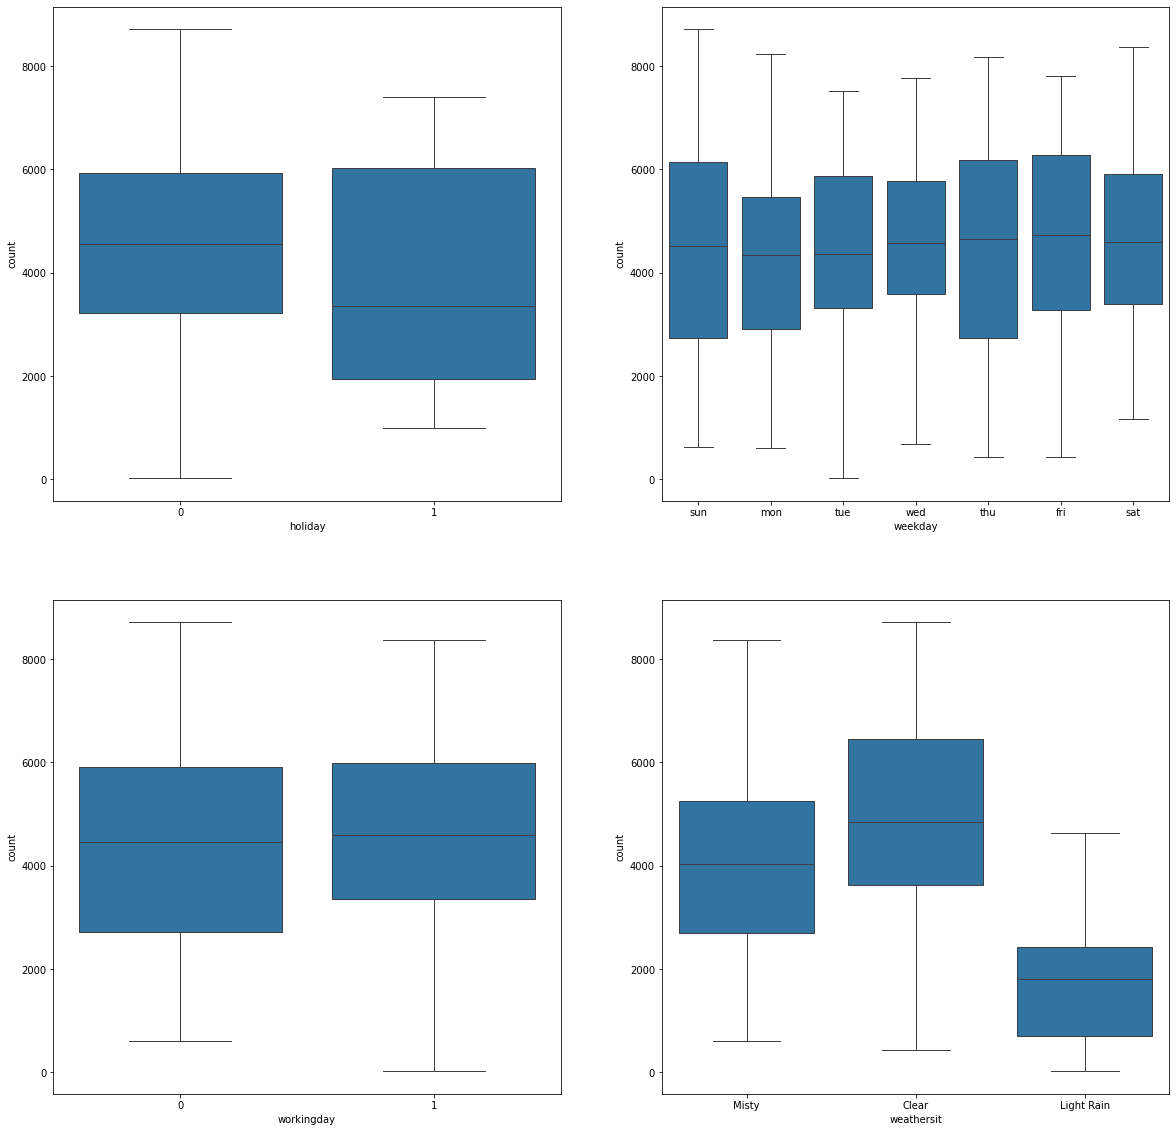

In [308]:
# Boxplot for categorical variables to see bike rentals
categories = ['holiday', 'weekday', 'workingday', 'weathersit']
plt.figure(figsize=(20, 20))
for i, category in enumerate(categories):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df, x=category, y='count')
plt.show()

```
Observations: 
 - Pleasant and moderate weather conditions see higher bike rental demand.
 - Demand is almost the same across weekdays and working days.
 - Bike rentals decrease on holidays.

```

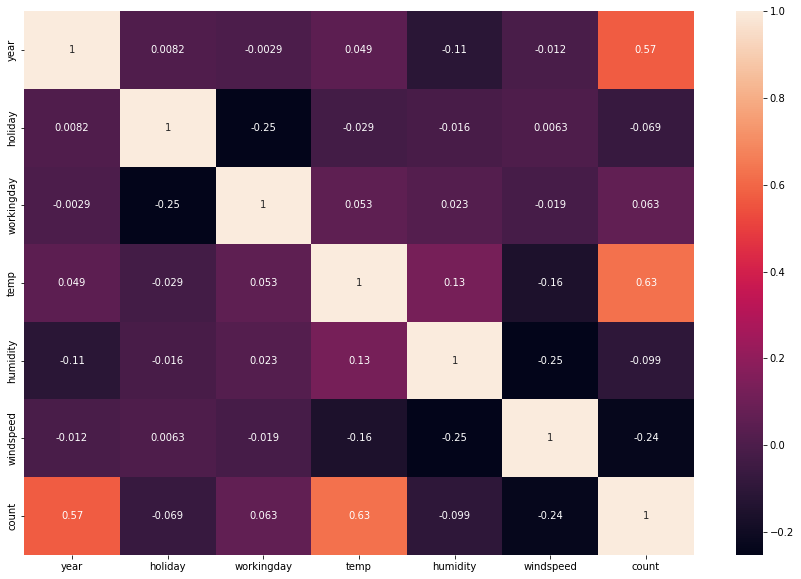

In [309]:
# Dropping the 'atemp' column as it is highly correlated with 'temp'
df.drop('atemp', axis=1, inplace=True)

# Calculating Correlation
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(15, 10))

# Drawing Heatmap of correlation
sns.heatmap(correlation_matrix, annot=True)
plt.show()

```
Observations: Some variables show linear relationships, making this a good dataset for a linear regression model.
```

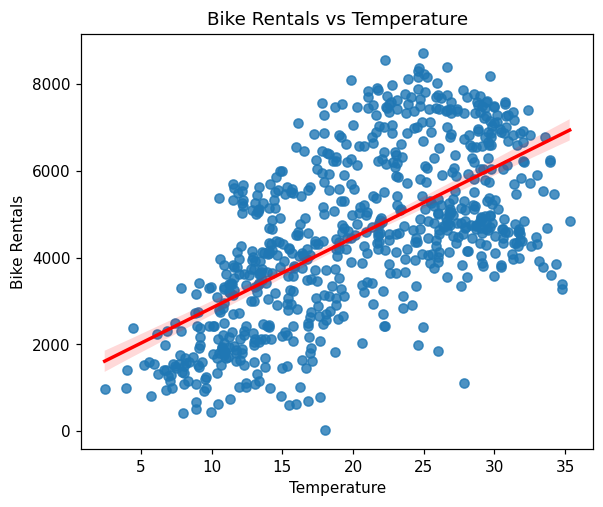

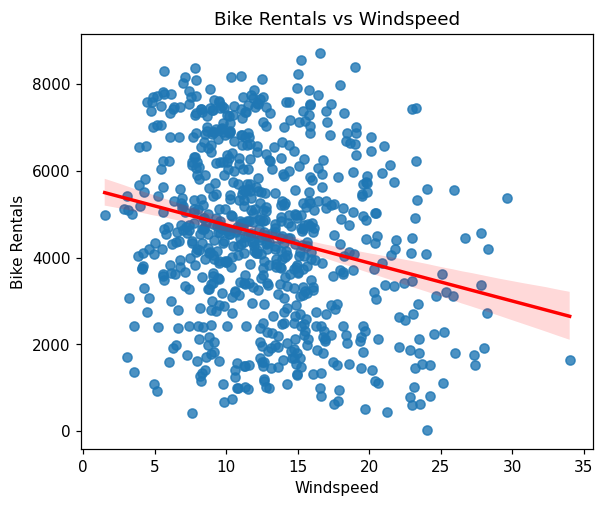

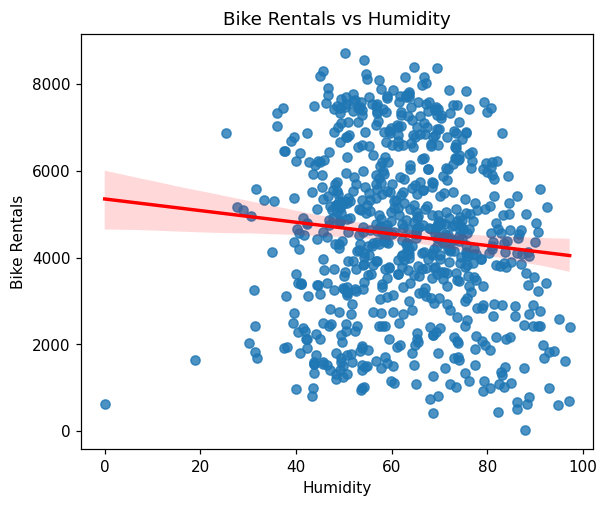

In [310]:
# Analyzing the relationship between 'count' and 'temp'
plt.figure(figsize=(6, 5), dpi=110)
plt.title("Bike Rentals vs Temperature", fontsize=12)
sns.regplot(data=df, y='count', x='temp', line_kws={"color": "red"})
plt.xlabel("Temperature")
plt.ylabel("Bike Rentals")
plt.show()

# Exploring the correlation between 'count' and 'windspeed'
plt.figure(figsize=(6, 5), dpi=110)
plt.title("Bike Rentals vs Windspeed", fontsize=12)
sns.regplot(data=df, y='count', x='windspeed', line_kws={"color": "red"})
plt.xlabel("Windspeed")
plt.ylabel("Bike Rentals")
plt.show()

# Investigating the relationship between 'count' and 'humidity'
plt.figure(figsize=(6, 5), dpi=110)
plt.title("Bike Rentals vs Humidity", fontsize=12)
sns.regplot(data=df, y='count', x='humidity', line_kws={"color": "red"})
plt.xlabel("Humidity")
plt.ylabel("Bike Rentals")
plt.show()

```
There is a positive linear relationship between bike rental demand ('count') and temperature, but a negative relationship with humidity and windspeed.

```

### **Step 6: Data Preparation for the model**

In [311]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [315]:
# Checking how the dataset looks with dummies
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,Spring,0,jan,0,sun,0,Misty,14.110847,80.5833,10.749882,985
1,Spring,0,jan,0,mon,0,Misty,14.902598,69.6087,16.652113,801
2,Spring,0,jan,0,tue,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,jan,0,wed,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,jan,0,thu,1,Clear,9.305237,43.6957,12.522300,1600


In [316]:
# Merging  the dataframe, with the dummy variable dataset. 
df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [317]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,sat,sun,thu,tue,wed,Light Rain,Misty,Spring,Summer,Winter
0,Spring,0,jan,0,sun,0,Misty,14.110847,80.5833,10.749882,...,False,True,False,False,False,False,True,True,False,False
1,Spring,0,jan,0,mon,0,Misty,14.902598,69.6087,16.652113,...,False,False,False,False,False,False,True,True,False,False
2,Spring,0,jan,0,tue,1,Clear,8.050924,43.7273,16.636703,...,False,False,False,True,False,False,False,True,False,False
3,Spring,0,jan,0,wed,1,Clear,8.200000,59.0435,10.739832,...,False,False,False,False,True,False,False,True,False,False
4,Spring,0,jan,0,thu,1,Clear,9.305237,43.6957,12.522300,...,False,False,True,False,False,False,False,True,False,False


In [ ]:
# Ensure all columns are numeric
df_new = df_new.apply(pd.to_numeric, errors='coerce')
df_new = df_new.fillna(0)

# Check for any remaining non-numeric data
if df_new.select_dtypes(include=['object']).empty:
    print("All columns are numeric.")
else:
    print("There are still non-numeric columns.")

# Convert boolean columns to numeric (0 and 1)
df_new = df_new.applymap(lambda x: 1 if x is True else (0 if x is False else x))

df_new.info()

In [320]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [322]:
# check the head of new dataframe
df_new.head()

# check the shape of new dataframe
df_new.shape

# check the column info of new dataframe 
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   humidity    730 non-null    float64
 5   windspeed   730 non-null    float64
 6   count       730 non-null    int64  
 7   aug         730 non-null    int64  
 8   dec         730 non-null    int64  
 9   feb         730 non-null    int64  
 10  jan         730 non-null    int64  
 11  jul         730 non-null    int64  
 12  jun         730 non-null    int64  
 13  mar         730 non-null    int64  
 14  may         730 non-null    int64  
 15  nov         730 non-null    int64  
 16  oct         730 non-null    int64  
 17  sep         730 non-null    int64  
 18  mon         730 non-null    int64  
 19  sat         730 non-null    i

### **Step 7: Spittling into Test & Train**

In [323]:
# splitting the dataframe into Train and Test
np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [325]:
# check the shape of training datatset
df_train.shape


(510, 29)

In [326]:
# check the shape of testing datatset
df_test.shape

(220, 29)

In [328]:
# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','humidity','windspeed','count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [329]:
# describing the dataset after applying
df_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,count,aug,dec,feb,...,sat,sun,thu,tue,wed,Light Rain,Misty,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.127451,0.154902,0.158824,0.150980,0.131373,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.333805,0.362166,0.365870,0.358381,0.338139,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


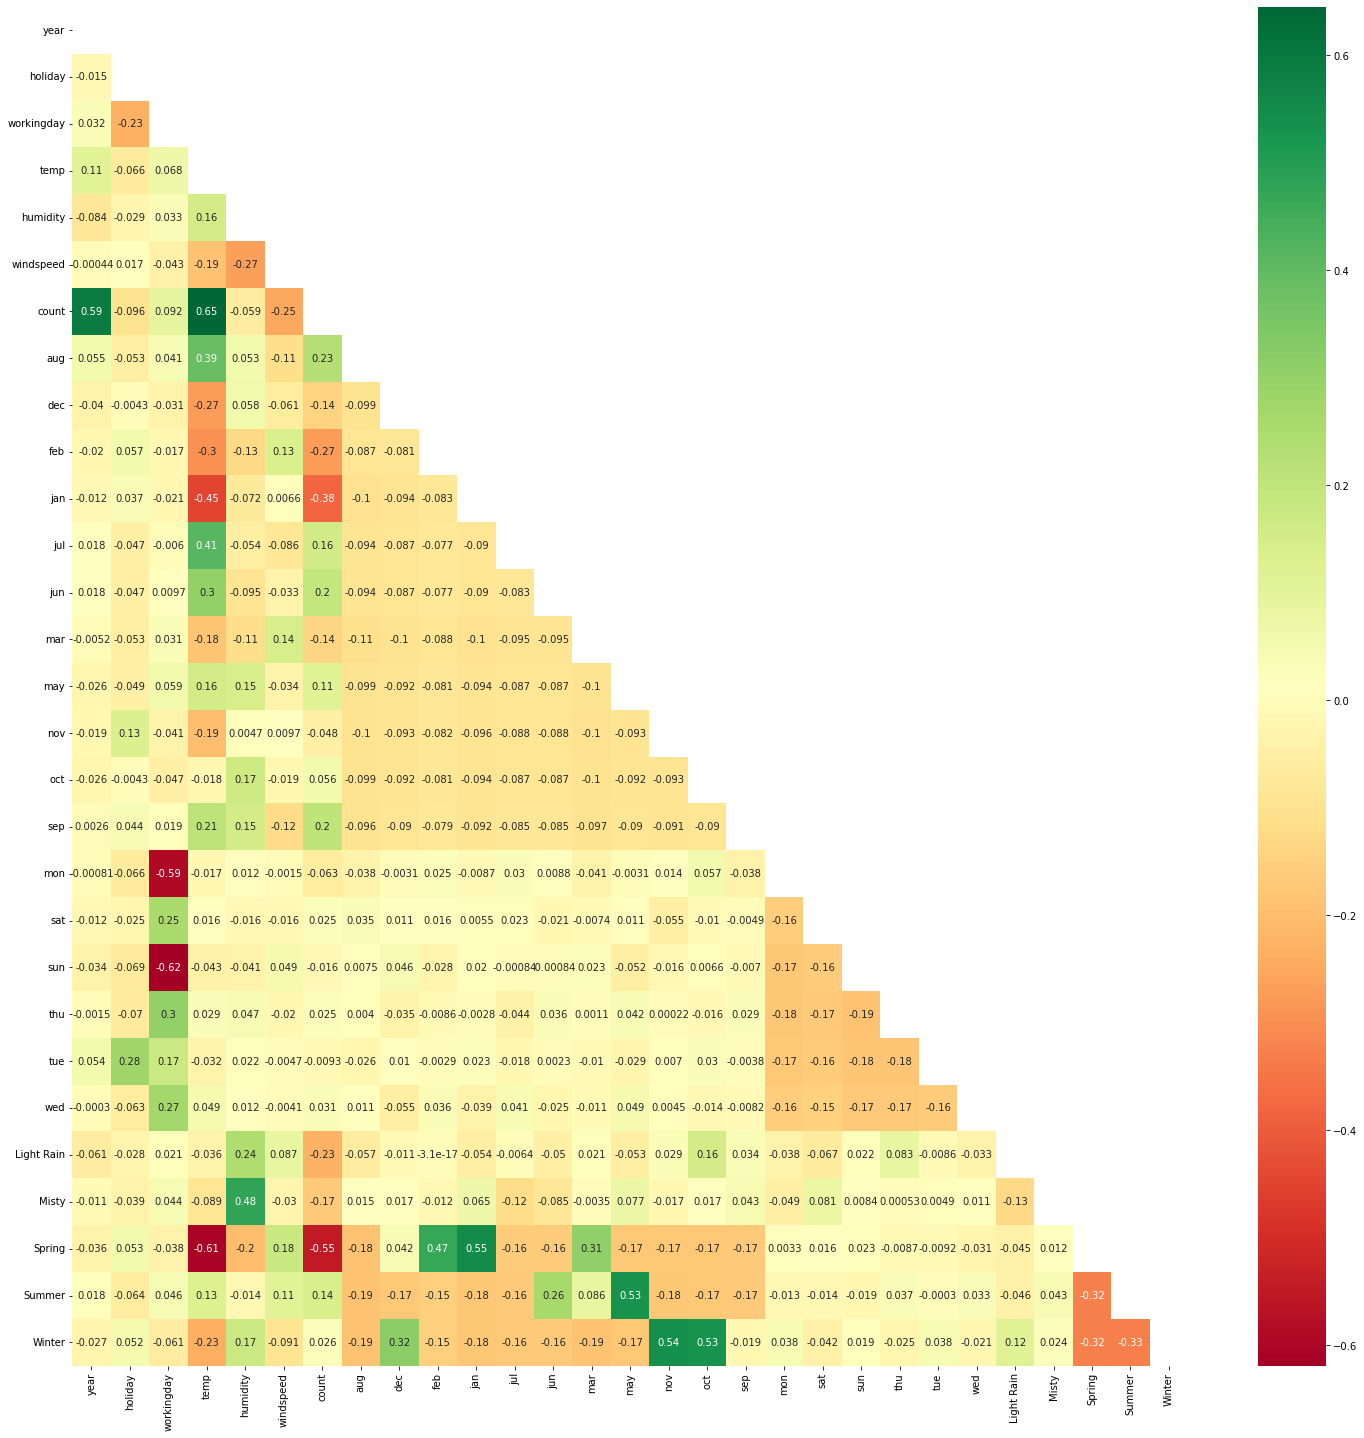

In [330]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

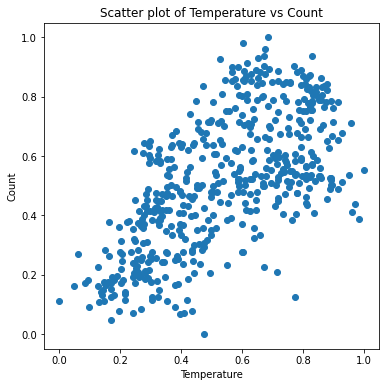

In [334]:
# Now plot the scatter plot
plt.figure(figsize=[6,6])
plt.scatter(df_train['temp'], df_train['count'])
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Scatter plot of Temperature vs Count')
plt.show()

```
The count variable appears to be correlated with both the year and temp variables. Additionally, there is a noticeable correlation between Misty and humidity. The Spring season shows a strong correlation with January and February, Summer with May, and Winter with October and November. Scatter plot Visualization confirms the positive correlation between temp and count.
``````

### **Step 8 : Building a linear model using RFE**

In [336]:
y_train = df_train.pop('count')
X_train = df_train

In [338]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Initialize the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Apply RFE to select the top 15 features
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [342]:
#checking which columns have been selected
col = X_train.columns[rfe.support_]
print(col)

# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jul',
       'sep', 'mon', 'sun', 'Light Rain', 'Misty', 'Spring', 'Summer',
       'Winter'],
      dtype='object')


Index(['aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may', 'nov', 'oct', 'sat',
       'thu', 'tue', 'wed'],
      dtype='object')

In [341]:
# Running the linear model
ols_model = sm.OLS(y_train, X_train_rfe).fit()

# Let's see the summary of our linear model
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          2.11e-191
Time:                        18:00:06   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1995      0.028      7.200      0.0

In [343]:
#Define a function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [344]:
# dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [345]:
# calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,50.68
9,sun,12.20
8,mon,11.79
12,Spring,5.02
3,temp,3.62
14,Winter,3.49
1,holiday,2.91
13,Summer,2.62
4,humidity,1.91
11,Misty,1.57


'workingday' column shows high VIF value and hence we will remove it.

Step below iteratively performed to refine the model. The criteria for excluding variables are flexible and depend on the specific problem. In this case, variables with a p-value greater than 0.04 and a VIF value exceeding 10 are removed. For VIF values between 5 and 10, further inspection is needed to determine the significance of the variable. If a variable is deemed significant, other variables may be dropped to see if the VIF value of the current variable decreases

In [346]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          2.11e-191
Time:                        18:04:57   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1995      0.028      7.200      0.0

In [347]:
# As workingday shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,humidity,28.25
2,temp,16.06
4,windspeed,4.68
11,Spring,4.03
13,Winter,3.36
12,Summer,2.79
10,Misty,2.30
0,year,2.08
5,jul,1.59
6,sep,1.39


Humidity shows high VIF value hence we can drop it

In [360]:
# Drop the 'humidity' and 'workingday' columns
X_train_new = X_train_rfe.drop(['humidity', 'workingday'], axis=1)

# Calculate VIF for the new model
vif_new = calculateVIF(X_train_new)
print(vif_new)

      Features   VIF
2         temp  5.18
3    windspeed  4.63
11      Summer  2.24
10      Spring  2.13
0         year  2.07
12      Winter  1.84
4          jul  1.59
9        Misty  1.56
5          sep  1.34
7          sun  1.23
6          mon  1.22
8   Light Rain  1.08
1      holiday  1.06


In [366]:
# Building another linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          1.45e-189
Time:                        18:16:12   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2060      0.029      7.074      0.0

sun shows high P value and hence we can try dropping it

In [363]:
# Drop the 'sun' 'humidity' and 'workingday' columns
X_train_new = X_train_rfe.drop(['sun','humidity', 'workingday'], axis=1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.60
10,Summer,2.24
9,Spring,2.11
0,year,2.07
11,Winter,1.81
4,jul,1.59
8,Misty,1.56
5,sep,1.34
6,mon,1.18


In [367]:
#rebuilding the model
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          1.45e-189
Time:                        18:19:51   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2060      0.029      7.074      0.0

```
-  We have no p value greater than 4 and VIF greater than 10. Since we have a variable with VIF >5, we need to inspect it further.
- Since temp has significant relation with count(0.63 as we saw in the Coorelation heatmap we had drawn up earlier), we will try  to drop other insignificant variables to see if VIF of temp Improves.
```

<span style="color: rgb(36, 36, 36); font-family: &quot;Segoe UI&quot;, &quot;Segoe UI Web (West European)&quot;, -apple-system, BlinkMacSystemFont, Roboto, &quot;Helvetica Neue&quot;, sans-serif; background-color: rgb(250, 250, 250);">Based on the coefficients provided, the variable with the lowest absolute coefficient is&nbsp;</span> `jul` <span style="color: rgb(36, 36, 36); font-family: &quot;Segoe UI&quot;, &quot;Segoe UI Web (West European)&quot;, -apple-system, BlinkMacSystemFont, Roboto, &quot;Helvetica Neue&quot;, sans-serif; background-color: rgb(250, 250, 250);">&nbsp;with a coefficient of -0.0492. This suggests that&nbsp;</span> `jul` <span style="color: rgb(36, 36, 36); font-family: &quot;Segoe UI&quot;, &quot;Segoe UI Web (West European)&quot;, -apple-system, BlinkMacSystemFont, Roboto, &quot;Helvetica Neue&quot;, sans-serif; background-color: rgb(250, 250, 250);">&nbsp;might be the next candidate to be dropped from the model, as it has the smallest impact on the dependent variable.</span>

In [368]:
# Drop the 'sun', 'humidity', 'workingday', and 'jul' columns
X_train_new = X_train_rfe.drop(['sun', 'humidity', 'workingday', 'jul'], axis=1)

# Run the function to calculate VIF for the new model
vif_new = calculateVIF(X_train_new)
print(vif_new)

      Features   VIF
3    windspeed  4.60
2         temp  3.91
0         year  2.07
8       Spring  2.02
9       Summer  1.91
10      Winter  1.66
7        Misty  1.55
4          sep  1.23
5          mon  1.18
6   Light Rain  1.08
1      holiday  1.05


In [369]:
#rebuilding the model
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.2
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          3.23e-189
Time:                        18:22:59   Log-Likelihood:                 503.99
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     498   BIC:                            -933.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1981      0.029      6.794      0.0

```
 Since all VIF value is unnder 5 and no p value is above 4, we will conclude this the best possible model to predict Count
 
```

### **Step 9: Residual Analysis on the training data and model validation.**

In [372]:
# Checking the parameters and their coefficient values
lr_4.params

const         0.198086
year          0.234000
holiday      -0.104300
temp          0.478161
windspeed    -0.148022
sep           0.089359
mon          -0.049479
Light Rain   -0.290403
Misty        -0.080899
Spring       -0.054372
Summer        0.062284
Winter        0.096907
dtype: float64

In [373]:
y_train_pred = lr_4.predict(X_train_lm_4)

<ipython-input-374-5853e52f8842>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


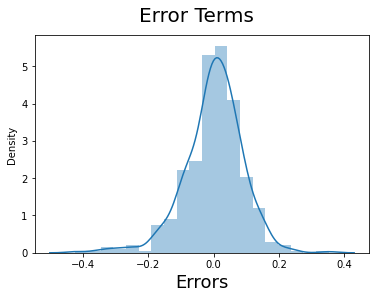

Text(0.5, 0, 'Errors')

In [374]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

#### Multicollinearity Check

In [375]:
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.91
0,year,2.07
8,Spring,2.02
9,Summer,1.91
10,Winter,1.66
7,Misty,1.55
4,sep,1.23
5,mon,1.18
6,Light Rain,1.08


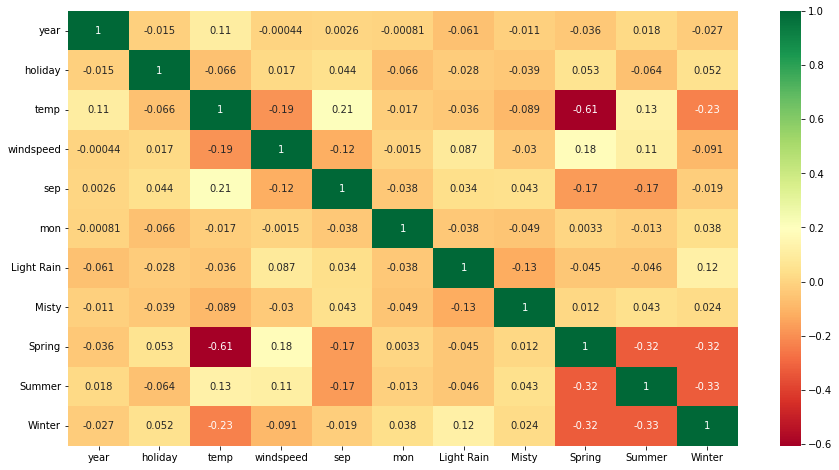

In [376]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

We dont see Multicollinearity in the variables

#### Homoscedasticity Check

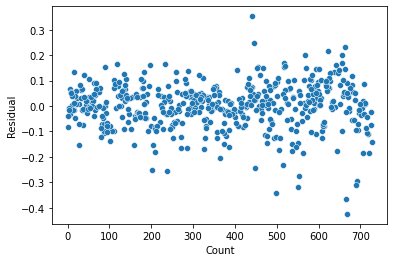

In [380]:
y_train_pred = lr_4.predict(X_train_lm_4)
residual = y_train - y_train_pred
sns.scatterplot(residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

```
From above plot we can observe that there is no visible pattern formed
```

**Normality**

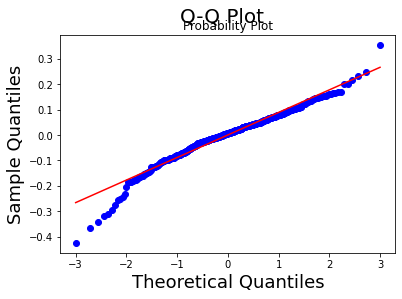

In [392]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot
fig = plt.figure()
stats.probplot(y_train - y_train_pred, dist="norm", plot=plt)
fig.suptitle('Q-Q Plot', fontsize=20)
plt.xlabel('Theoretical Quantiles', fontsize=18)
plt.ylabel('Sample Quantiles', fontsize=18)
plt.show()

```
Points lie approximately along a straight line, it indicates that the residuals are normally distributed
```

### **Step 10 : Making Predictions with the Final Model**

After fitting the model and ensuring the error terms are normally distributed, we can proceed to make predictions using our final model.

To maintain consistency, we need to apply the same scaling to the test dataset as we did with the training data. Here's how we can do it:

In [383]:
# Applying scaling on the test dataset

num_vars = ['temp', 'humidity', 'windspeed','count']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,humidity,windspeed,count,aug,dec,feb,...,sat,sun,thu,tue,wed,Light Rain,Misty,Spring,Summer,Winter
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,1,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,0,...,0,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,1,0,0,...,0,0,1,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [384]:
df_test.describe()

,year,holiday,workingday,temp,humidity,windspeed,count,aug,dec,feb,...,sat,sun,thu,tue,wed,Light Rain,Misty,Spring,Summer,Winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,...,0.177273,0.118182,0.100000,0.127273,0.168182,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,...,0.382770,0.323559,0.300684,0.334038,0.374881,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Splitting the Data into X_test and y_test**

First, we separate the target variable cnt from the test dataset:

In [385]:
y_test = df_test.pop('count')
X_test = df_test
col1 = X_train_new.columns

X_test = X_test[col1]

**Adding a Constant Variable to the Test DataFrame**

Next, we add a constant variable to the test DataFrame and make predictions using our final model:

In [386]:
# Adding constant variable to test dataframe
X_test_lm_4 = sm.add_constant(X_test)
y_pred = lr_4.predict(X_test_lm_4)


r2 = r2_score(y_test, y_pred)
round(r2, 4)

0.8066

### **Step 11: Model Evaluation**

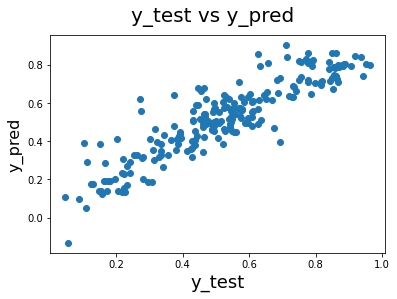

Text(0, 0.5, 'y_pred')

In [387]:
# Plotting Y_test vs Y_pred Scatter plot

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [389]:
round(lr_4.params,4)

const         0.1981
year          0.2340
holiday      -0.1043
temp          0.4782
windspeed    -0.1480
sep           0.0894
mon          -0.0495
Light Rain   -0.2904
Misty        -0.0809
Spring       -0.0544
Summer        0.0623
Winter        0.0969
dtype: float64

```
Based on the coefficients of our final model, we can see that the equation of our best-fitted line is:
const = 0.1981 + 0.2340 * year - 0.1043 * holiday + 0.4782 * temp - 0.1480 * windspeed + 0.0894 * sep - 0.0495 * mon - 0.2904 * Light Rain - 0.0809 * Misty - 0.0544 * Spring + 0.0623 * Summer + 0.0969 * Winter
``````

In [390]:
# Calculating Adjusted-R^2 value for the test dataset
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7963


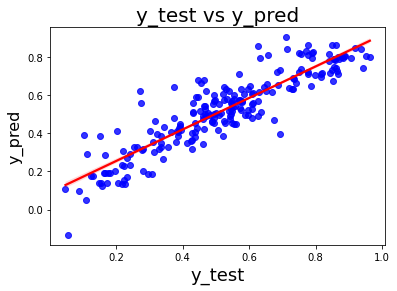

In [391]:
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

```
Based on the comparison between the training and testing datasets (0.8066 and 0.7963), we can infer that the model is reliable since the R² score shows negligible difference between the two datasets. This indicates that the model generalizes well to new data.

```

Significant Variables for Predicting Bike Demand

- Holiday: Negative impact on demand.
- Temperature: Positive impact on demand.
- Windspeed: Negative impact on demand.
- Seasons: Summer, Spring, and Winter have varying impacts.
- Months: July and September show significant demand.
- Year: Positive impact on demand.
- Weather Situation: Bad and moderate weather conditions affect demand.